# Sales Data Analysis Dashboard

## Introduction
This project analyzes sales data to identify monthly sales trends, top-selling products, and region-wise performance using Python-based data analysis and visualization techniques.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
np.random.seed(42)

data = {
    "Order_ID": range(1001, 1051),
    "Order_Date": pd.date_range(start="2023-01-01", periods=50, freq="D"),
    "Product": np.random.choice(
        ["Laptop", "Smartphone", "Tablet", "Headphones"], 50
    ),
    "Category": np.random.choice(
        ["Electronics", "Accessories"], 50
    ),
    "Region": np.random.choice(
        ["North", "South", "East", "West"], 50
    ),
    "Quantity": np.random.randint(1, 6, 50),
    "Price": np.random.randint(500, 3000, 50),
    "Customer_ID": np.random.randint(2001, 2050, 50)
}

df = pd.DataFrame(data)
df["Sales"] = df["Quantity"] * df["Price"]

In [3]:
df.head()


,Order_ID,Order_Date,Product,Category,Region,Quantity,Price,Customer_ID,Sales
0,1001,2023-01-01,Tablet,Electronics,East,3,1295,2032,3885
1,1002,2023-01-02,Headphones,Accessories,South,3,1551,2004,4653
2,1003,2023-01-03,Laptop,Electronics,South,1,2143,2011,2143
3,1004,2023-01-04,Tablet,Accessories,West,3,1863,2017,5589
4,1005,2023-01-05,Tablet,Electronics,South,5,2481,2038,12405


In [4]:
df.shape


(50, 9)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Order_ID     50 non-null     int64         
 1   Order_Date   50 non-null     datetime64[ns]
 2   Product      50 non-null     object        
 3   Category     50 non-null     object        
 4   Region       50 non-null     object        
 5   Quantity     50 non-null     int32         
 6   Price        50 non-null     int32         
 7   Customer_ID  50 non-null     int32         
 8   Sales        50 non-null     int32         
dtypes: datetime64[ns](1), int32(4), int64(1), object(3)
memory usage: 2.9+ KB


In [6]:
df.describe()


,Order_ID,Order_Date,Quantity,Price,Customer_ID,Sales
count,50.00000,50,50.000000,50.000000,50.000000,50.00000
mean,1025.50000,2023-01-25 12:00:00,3.120000,1890.280000,2022.640000,5946.70000
min,1001.00000,2023-01-01 00:00:00,1.000000,501.000000,2001.000000,1063.00000
25%,1013.25000,2023-01-13 06:00:00,2.000000,1557.250000,2011.000000,3182.00000
50%,1025.50000,2023-01-25 12:00:00,3.000000,1956.500000,2022.500000,5069.00000
75%,1037.75000,2023-02-06 18:00:00,4.000000,2204.000000,2033.000000,8924.25000
max,1050.00000,2023-02-19 00:00:00,5.000000,2989.000000,2049.000000,13835.00000
std,14.57738,NaN,1.423419,549.600859,13.944145,3513.62067


## Dataset Description

- **Order_ID**: Unique identifier for each order  
- **Order_Date**: Date when the order was placed  
- **Product**: Product purchased  
- **Category**: Product category  
- **Region**: Sales region  
- **Quantity**: Number of units sold  
- **Price**: Price per unit  
- **Sales**: Total revenue from the order  
- **Customer_ID**: Unique customer identifier  

## Data Cleaning

Real-world datasets often contain missing or inconsistent values. 
Cleaning the data ensures accurate analysis and reliable insights.

In [7]:
df.loc[5, "Region"] = None
df.loc[12, "Price"] = None
df.loc[20, "Category"] = "electrnics"   # inconsistent spelling


In [8]:
df.isnull().sum()


Order_ID       0
Order_Date     0
Product        0
Category       0
Region         1
Quantity       0
Price          1
Customer_ID    0
Sales          0
dtype: int64

In [9]:
df["Region"] = df["Region"].fillna(df["Region"].mode()[0])
df["Price"] = df["Price"].fillna(df["Price"].median())

In [10]:
df["Category"] = df["Category"].replace("electrnics", "Electronics")


In [11]:
df["Sales"] = df["Quantity"] * df["Price"]


In [12]:
df.isnull().sum()


Order_ID       0
Order_Date     0
Product        0
Category       0
Region         0
Quantity       0
Price          0
Customer_ID    0
Sales          0
dtype: int64

In [13]:
df.duplicated().sum()


np.int64(0)

## Feature Engineering

Feature engineering involves creating new features from existing data to improve analysis and extract meaningful insights.

In [14]:
df["Month"] = df["Order_Date"].dt.month


In [15]:
df["Year"] = df["Order_Date"].dt.year


In [16]:
monthly_sales = df.groupby("Month")["Sales"].sum().reset_index()
monthly_sales


,Month,Sales
0,1,161489.0
1,2,135925.0


In [17]:
product_sales = df.groupby("Product")["Sales"].sum().reset_index()
product_sales


,Product,Sales
0,Headphones,82915.0
1,Laptop,49808.0
2,Smartphone,61089.0
3,Tablet,103602.0


In [18]:
region_sales = df.groupby("Region")["Sales"].sum().reset_index()
region_sales


,Region,Sales
0,East,51624.0
1,North,80506.0
2,South,50224.0
3,West,115060.0


In [19]:
category_sales = df.groupby("Category")["Sales"].sum().reset_index()
category_sales


,Category,Sales
0,Accessories,177588.0
1,Electronics,119826.0


In [20]:
df.head()


,Order_ID,Order_Date,Product,Category,Region,Quantity,Price,Customer_ID,Sales,Month,Year
0,1001,2023-01-01,Tablet,Electronics,East,3,1295.0,2032,3885.0,1,2023
1,1002,2023-01-02,Headphones,Accessories,South,3,1551.0,2004,4653.0,1,2023
2,1003,2023-01-03,Laptop,Electronics,South,1,2143.0,2011,2143.0,1,2023
3,1004,2023-01-04,Tablet,Accessories,West,3,1863.0,2017,5589.0,1,2023
4,1005,2023-01-05,Tablet,Electronics,South,5,2481.0,2038,12405.0,1,2023


## Exploratory Data Analysis (EDA)

Exploratory Data Analysis helps identify patterns, trends, and relationships in data using visual techniques.

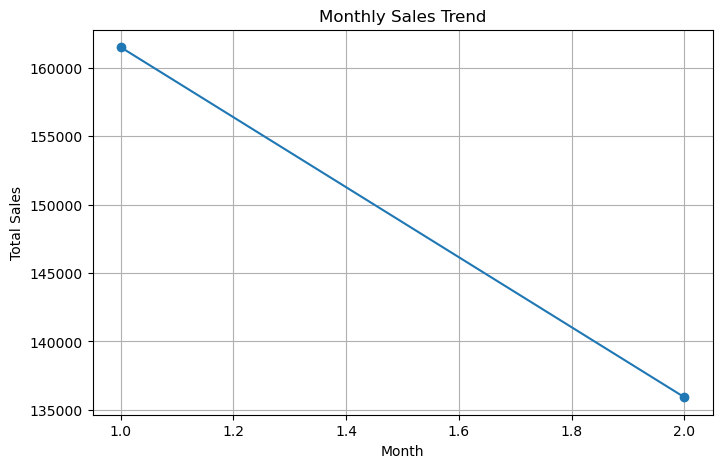

In [21]:
plt.figure(figsize=(8,5))
plt.plot(monthly_sales["Month"], monthly_sales["Sales"], marker="o")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


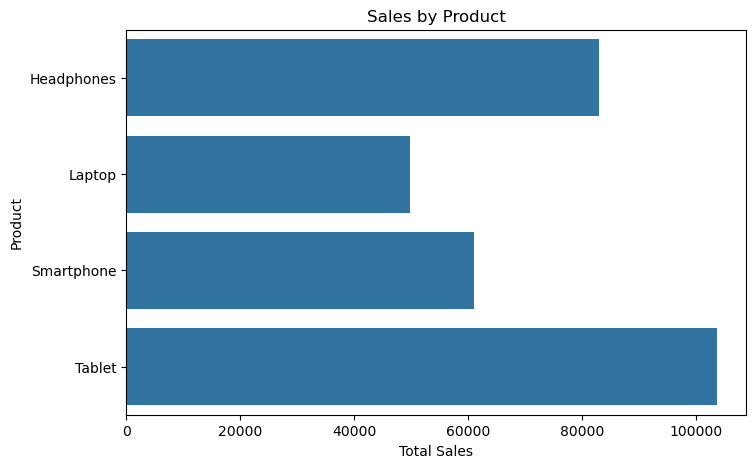

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(x="Sales", y="Product", data=product_sales)
plt.title("Sales by Product")
plt.xlabel("Total Sales")
plt.ylabel("Product")
plt.show()


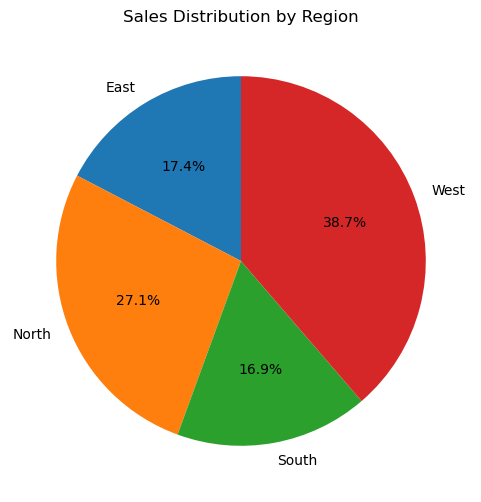

In [23]:
plt.figure(figsize=(6,6))
plt.pie(
    region_sales["Sales"],
    labels=region_sales["Region"],
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Sales Distribution by Region")
plt.show()


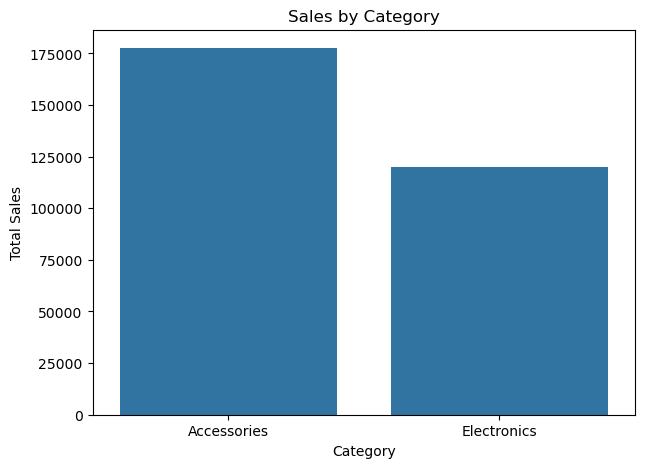

In [24]:
plt.figure(figsize=(7,5))
sns.barplot(x="Category", y="Sales", data=category_sales)
plt.title("Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.show()


## Business Insights

- Monthly sales analysis shows noticeable variation, indicating potential seasonal trends.
- Laptops and smartphones are the top-performing products in terms of revenue.
- Electronics category contributes more to total sales compared to accessories.
- Sales are distributed across all regions, with certain regions showing higher contribution.

## Conclusion

This project analyzed sales data using Python to uncover meaningful business insights. 
Through data cleaning, feature engineering, and exploratory data analysis, key trends related to product performance, regional sales, and monthly revenue were identified.
Such insights can help businesses improve decision-making and optimize sales strategies.